#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Collaborate as Collab

c:\Users\Sid\AppData\Local\Programs\Python\Python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
from scipy.sparse import csr_matrix

In [4]:
df_song_1 = pd.read_csv('song_data (1).csv')
df_song_1.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [5]:
df_song_2 = pd.read_csv('triplets_file.csv')
df_song_2.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


#### Data Preprocessing

In [7]:
# combining both data
df_song_com = pd.merge(df_song_1.drop_duplicates(['song_id']), df_song_2, on='song_id', how='right')
df_song_com.head()

,song_id,title,release,artist_name,year,user_id,listen_count
0,SOAKIMP12A8C130995,The Cove,Thicker Than Water,Jack Johnson,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,SOBBMDR12A8C13253B,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2
2,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [8]:
df_song_com.describe()

,year,listen_count
count,2.000000e+06,2.000000e+06
mean,1.628645e+03,3.045485e+00
std,7.787283e+02,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,1.984000e+03,1.000000e+00
50%,2.002000e+03,1.000000e+00
75%,2.007000e+03,3.000000e+00
max,2.010000e+03,2.213000e+03


In [9]:
df_song_com.shape

(2000000, 7)

#### Feature Extraction

In [10]:
# creating new feature combining title and artist name
df_song_com['song'] = df_song_com['title']+' - '+df_song_com['artist_name']
df_song_com.head()

,song_id,title,release,artist_name,year,user_id,listen_count,song
0,SOAKIMP12A8C130995,The Cove,Thicker Than Water,Jack Johnson,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,The Cove - Jack Johnson
1,SOBBMDR12A8C13253B,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2,Entre Dos Aguas - Paco De Lucia
2,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Stronger - Kanye West
3,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Constellations - Jack Johnson
4,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Learn To Fly - Foo Fighters


In [11]:
#checking null value
df_song_com.isnull().sum()

song_id         0
title           0
release         0
artist_name     0
year            0
user_id         0
listen_count    0
song            0
dtype: int64

In [12]:
df_song_com.shape

(2000000, 8)

In [13]:
df_song_com.describe()

,year,listen_count
count,2.000000e+06,2.000000e+06
mean,1.628645e+03,3.045485e+00
std,7.787283e+02,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,1.984000e+03,1.000000e+00
50%,2.002000e+03,1.000000e+00
75%,2.007000e+03,3.000000e+00
max,2.010000e+03,2.213000e+03


#### Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_data, test_data = train_test_split(df_song_com, test_size = 0.30, random_state=0)

In [16]:
train_data.head(10)

,song_id,title,release,artist_name,year,user_id,listen_count,song
563977,SOLPOOZ12A8C1370BD,What's Going On (Featuring Chuck D),Time After Time: The Best Of,Cyndi Lauper,2000,7cbee28673fd18b6a59e4812692993c0f37e7e2f,1,What's Going On (Featuring Chuck D) - Cyndi La...
1600081,SOTWSXL12A8C143349,Love Story,Het Beste Uit De Top 40 - 2009,Taylor Swift,2008,d3f36ae840ddc4e5e7479a5d691b2ce779e1bd30,1,Love Story - Taylor Swift
1644853,SOEBLMX12A8C13DDD4,New Morning,New Morning,Sabrina Malheiros,2008,c346b02ee5c98eb151f48c52c9a39f135d0b3c0c,1,New Morning - Sabrina Malheiros
641460,SOEPZQS12A8C1436C7,Ghosts 'n' Stuff (Original Instrumental Mix),Ghosts 'n' Stuff,Deadmau5,2009,dacc26406dfa7a8afa34a1b33871dcc8fbf77cc5,1,Ghosts 'n' Stuff (Original Instrumental Mix) -...
452992,SODHZZY12A81C217D7,Rise,Rise,Flobots,2007,2351057581ba945b6d23047fb8e5a370d6feaed8,1,Rise - Flobots
928502,SOHKXZN12AB0187281,Carry Me In Your Dreams (Albania),Eurovision Song Contest 2009,Kejsi Tola,2009,2f40ca8c0f91cd157edcb96081049888534eb7f5,1,Carry Me In Your Dreams (Albania) - Kejsi Tola
1646668,SOYPBXB12A8AE4736D,Wonderlust King,Super Taranta!,Gogol Bordello,2005,0bbb2617c3edb0b78ac16915b31e8fa0bef36c45,1,Wonderlust King - Gogol Bordello
953407,SOIPYPB12A8C1360D4,My Immortal (Album Version),Fallen,Evanescence,2003,05f295d6e673560cf34ad51f98f74358e5dc5715,1,My Immortal (Album Version) - Evanescence
307352,SODEAWL12AB0187032,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0,7a082f2a65663c36b1dfb41b544dea630443cad5,1,American Idiot [feat. Green Day & The Cast Of ...
553860,SOHQNBP12AC468B2BC,The Writer,Lights,Ellie Goulding,2010,8705096a10144fdf759b2d8cf27508e92b4d9065,1,The Writer - Ellie Goulding


In [17]:
df_song = train_data

In [18]:
unique_users = df_song['user_id'].unique()
len(unique_users)

75893

In [19]:
unique_songs = df_song['song'].unique()  
len(unique_songs)

9953

In [20]:
unique_artists = df_song['artist_name'].unique()
len(unique_artists)

3375

In [21]:
df_song['listen_count'].value_counts()

1      797003
2      219126
3       99978
5       65088
4       57986
        ...  
553         1
676         1
605         1
295         1
488         1
Name: listen_count, Length: 276, dtype: int64

In [22]:
#grouping songs according to listen_count
grouped_song = df_song.groupby(['song']).agg({'listen_count': 'count'}).reset_index()

In [23]:
grouped_song

,song,listen_count
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,60
1,#40 - DAVE MATTHEWS BAND,237
2,& Down - Boys Noize,257
3,' Cello Song - Nick Drake,72
4,'97 Bonnie & Clyde - Eminem,64
...,...,...
9948,the Love Song - K-OS,48
9949,you were there with me - Four Tet,57
9950,¡Viva La Gloria! (Album Version) - Green Day,121
9951,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,50


In [24]:
sum_group = grouped_song['listen_count'].sum()

In [25]:
grouped_song['percentage']  = grouped_song['listen_count'].div(sum_group)*100

In [26]:
grouped_song

,song,listen_count,percentage
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,60,0.004286
1,#40 - DAVE MATTHEWS BAND,237,0.016929
2,& Down - Boys Noize,257,0.018357
3,' Cello Song - Nick Drake,72,0.005143
4,'97 Bonnie & Clyde - Eminem,64,0.004571
...,...,...,...
9948,the Love Song - K-OS,48,0.003429
9949,you were there with me - Four Tet,57,0.004071
9950,¡Viva La Gloria! (Album Version) - Green Day,121,0.008643
9951,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,50,0.003571


#### Top 10 songs

In [27]:
order=grouped_song.sort_values(['listen_count', 'song'], ascending =[0,1])

In [28]:
top_ten_songs = order[:10]
top_ten_songs

,song,listen_count,percentage
7127,Sehr kosmisch - Harmonia,5789,0.413500
9084,Undo - Björk,4937,0.352643
2068,Dog Days Are Over (Radio Edit) - Florence + Th...,4899,0.349929
9880,You're The One - Dwight Yoakam,4463,0.318786
6774,Revelry - Kings Of Leon,4338,0.309857
7115,Secrets - OneRepublic,4097,0.292643
3613,Horn Concerto No. 4 in E flat K495: II. Romanc...,3789,0.270643
2717,Fireflies - Charttraxx Karaoke,3357,0.239786
3485,Hey_ Soul Sister - Train,3320,0.237143
8847,Tive Sim - Cartola,3245,0.231786


In [29]:
labels = top_ten_songs['song'].tolist()
counts = top_ten_songs['listen_count'].tolist()

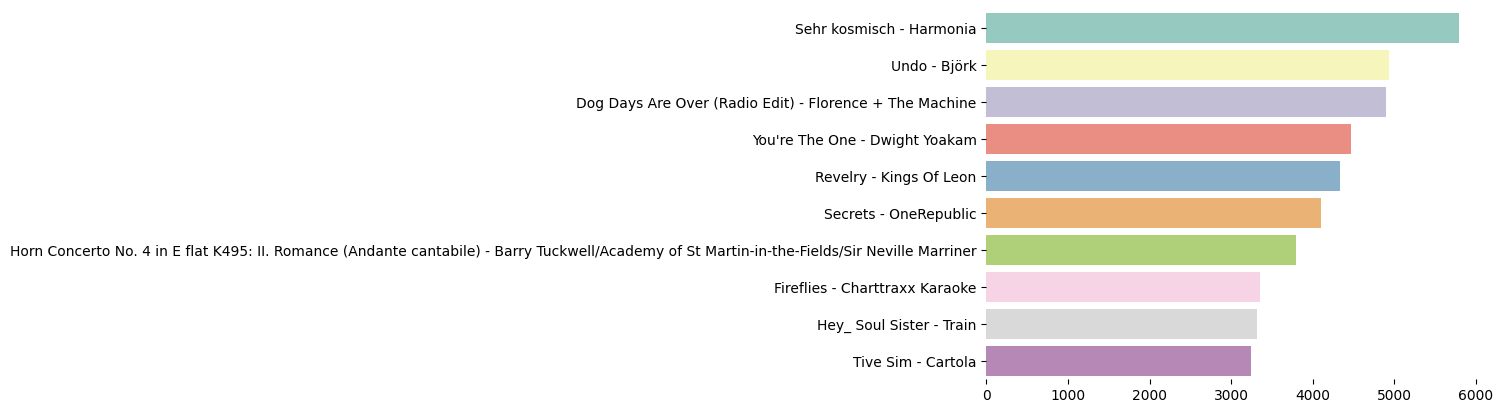

In [30]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

#### Top 10 Artist

In [31]:
order_1 = df_song.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], 
                                                                                                ascending = [0,1])

In [32]:
ten_pop_artists = order_1[:10]
ten_pop_artists


,artist_name,listen_count
649,Coldplay,20477
2850,The Black Keys,13971
1651,Kings Of Leon,13170
1107,Florence + The Machine,12725
1370,Jack Johnson,12482
2946,The Killers,11195
2374,Radiohead,10425
736,Daft Punk,10345
2073,Muse,9741
1554,Justin Bieber,9700


In [33]:
labels = ten_pop_artists['artist_name'].tolist()
counts= ten_pop_artists['listen_count'].tolist()

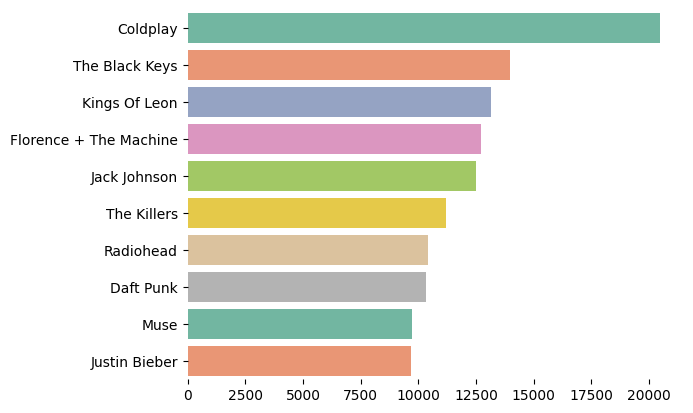

In [34]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

### Creating matrix

In [35]:
song_user = df_song_com.groupby('user_id')['song_id'].count()

In [36]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 26.194124657839247 songs


In [37]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 16.0 songs, with minimum 1 and maximum 711 songs


In [38]:
song_ten_id = song_user[song_user > 16].index.to_list()

In [39]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten =  df_song[ df_song['user_id'].isin(song_ten_id)].reset_index(drop=True)

In [40]:
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [41]:
df_unique_songs = df_song.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'song']]

In [42]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].song))
}

## COLLABORATIVE BASED MODEL

In [43]:
import numpy as np
import pandas
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz

In [44]:
#model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1).fit(mat_songs_features)

In [45]:
our_model = Collab.Recommender(metric='cosine', algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)

In [46]:
song = 'Rock Star'

In [47]:
new_recommendations = our_model.make_recommendation(new_song=song, n_recommendations=10)

Starting the recommendation process for Rock Star ...
... Done


In [48]:
new_recommendations

['Supermassive Black Hole (Twilight Soundtrack Version) - Muse',
 'Hey_ Soul Sister - Train',
 'OMG - Usher featuring will.i.am',
 'CIEÑ - Milczenie Owiec',
 'Holy Smoke - Iron Maiden',
 'Catch You Baby (Steve Pitron & Max Sanna Radio Edit) - Lonnie Gordon',
 'Na Vi - Dino Merlin',
 'If I Had You - Adam Lambert',
 'VÁNDORMADÁR - Crystal',
 'Greece 2000 - Three Drives']

In [49]:
import pickle

In [50]:
pickle.dump(our_model.model,open('model1.pkl','wb'))

In [51]:
new_recommendations(['Hey_ Soul Sister'])

TypeError: 'list' object is not callable